In [11]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

DWK неравенство:\
 $\forall \varepsilon >0,\ P(\underset{x}{sup} |F_n(x)-F(x)|>\varepsilon) \leq e^{-2n\varepsilon^2}$\
 Для проверки теоремы Гливенко–Кантелли я воспользуюсь функцией распределения нормального распределения.

In [16]:
#Сгенерируется 300 эмпирических функций распределения для каждого n и получаестся вероятность того, что эти 300 эмпирических функций распределения соответствуют неравенству DWK.
mean = 0 #~N(0,1)
std_dev = 1 #~N(0,1)
epsilon = 0.1 
n_list = list(range(1, 501, 10))
tries = 300
prob_y = np.zeros(len(n_list))
prob_x = np.arange(1, 501, 10)

# Создаём  обычный объект распространения
normal_distribution = norm(loc=mean, scale=std_dev)
#Рассматривается как непрерывное стандартное нормальное распределение.
x_values = np.linspace(-4, 4, 1000)
cdf_values = normal_distribution.cdf(x_values)

Ниже показано изображение, когда количество точек выборки увеличивается с 20 до 1020. Очень интуитивно видно, что эмпирическая функция распределения постепенно приближается к исходной функции распределения.

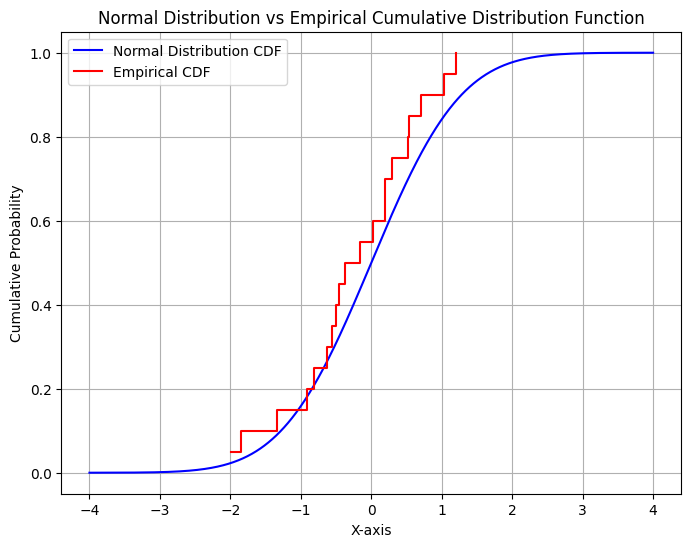

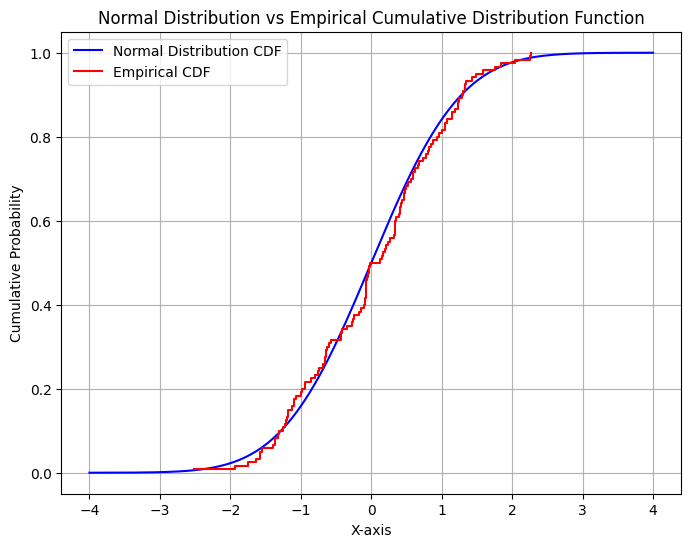

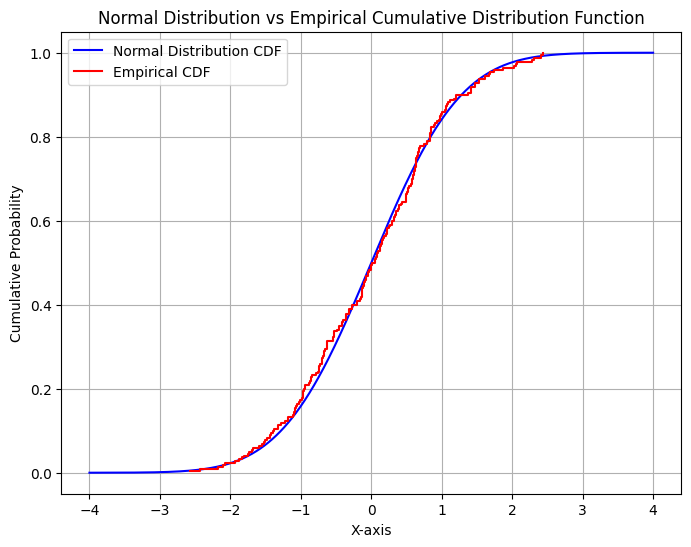

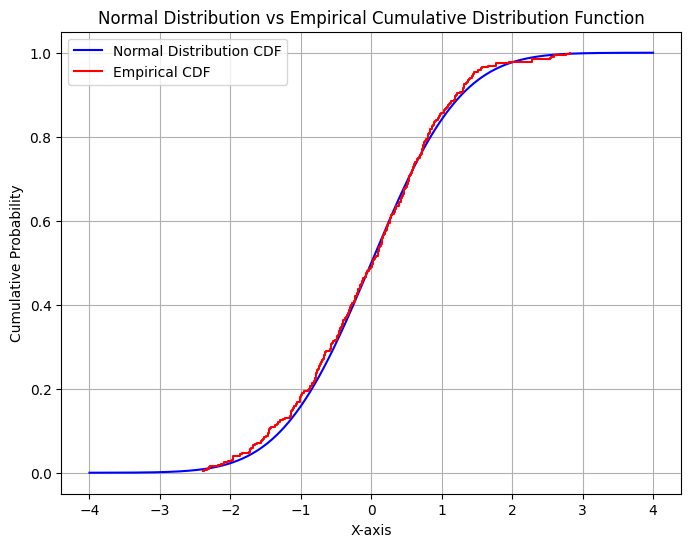

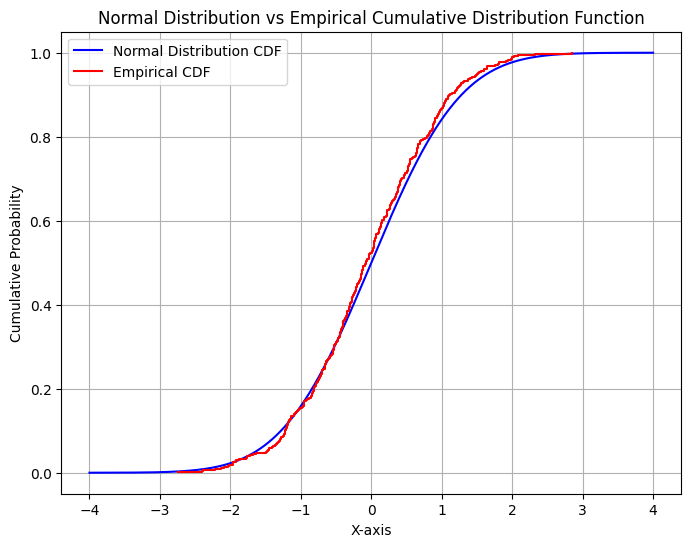

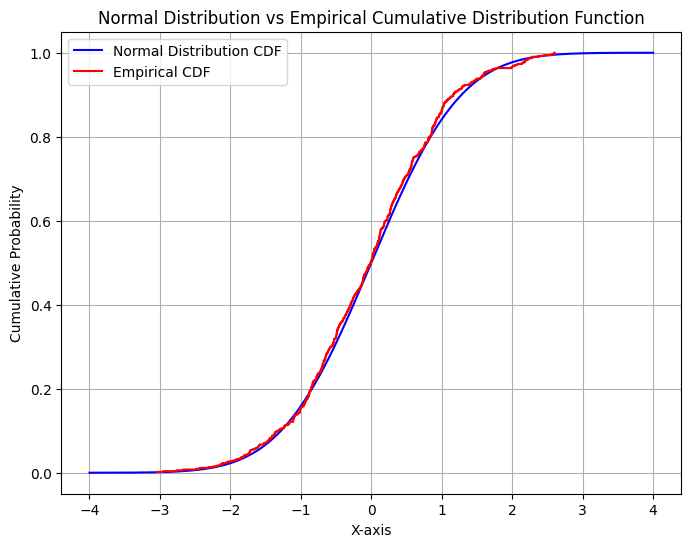

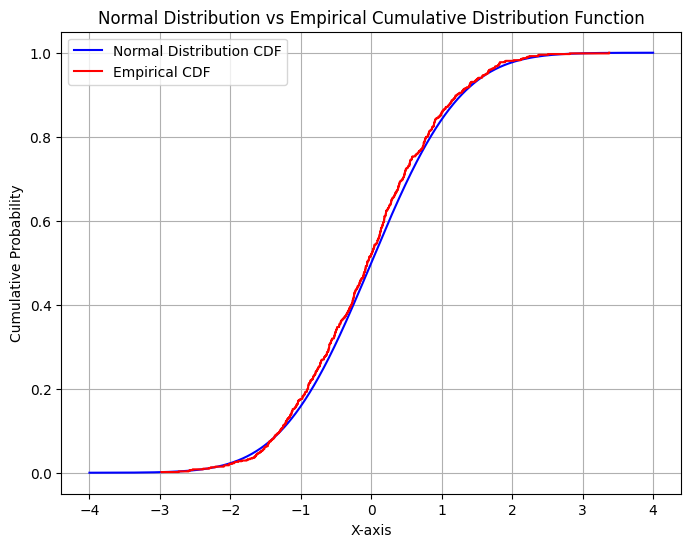

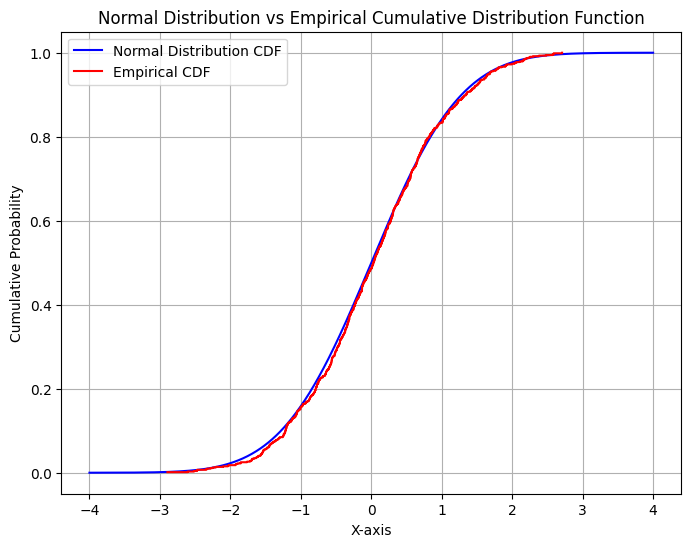

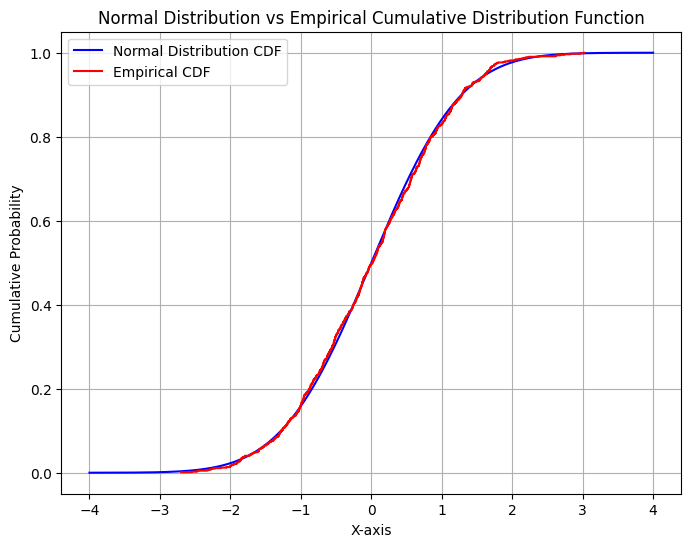

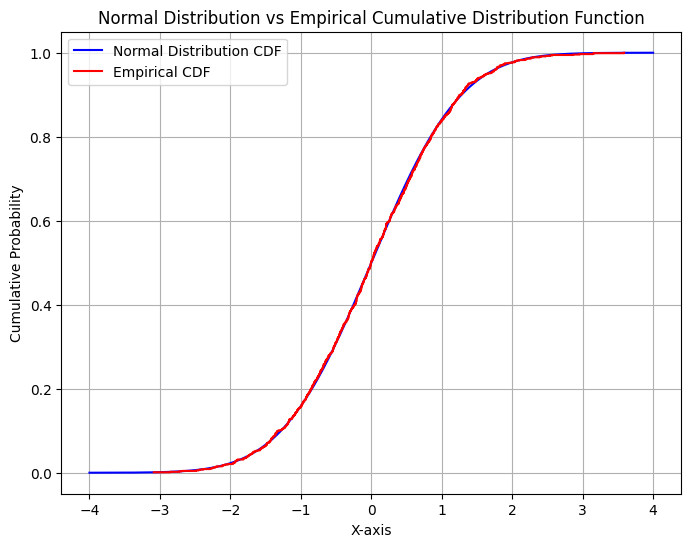

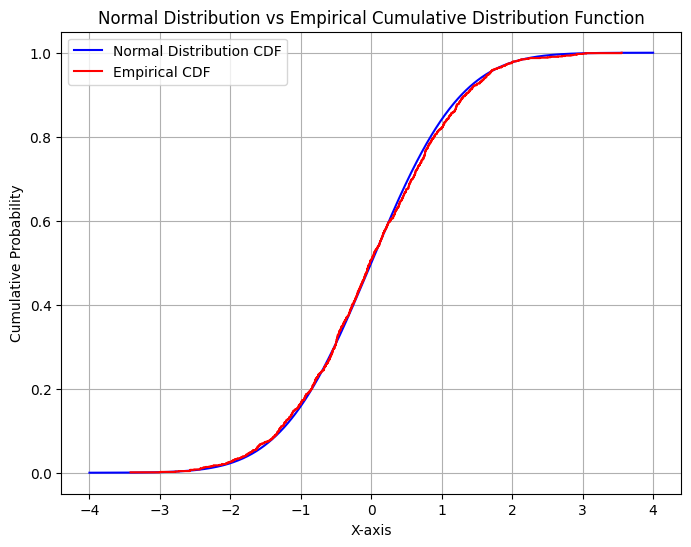

In [26]:
show_n_list = list(range(20, 1021, 100))

for i, n in enumerate(show_n_list):
    normal_distribution = norm(loc=mean, scale=std_dev)

    random_samples = np.random.normal(loc=mean, scale=std_dev, size=n)

    sorted_samples = np.sort(random_samples)
    ecdf = np.arange(1, len(sorted_samples) + 1) / len(sorted_samples)

    plt.figure(figsize=(8, 6))
    plt.plot(x_values, cdf_values, label='Normal Distribution CDF', color='blue')
    plt.step(sorted_samples, ecdf, label='Empirical CDF', color='red', where='post')
    plt.title('Normal Distribution vs Empirical Cumulative Distribution Function')
    plt.xlabel('X-axis')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

In [17]:
for i, n in enumerate(n_list):
    greater_times = 0
    for _ in range(tries):

        # Генерация случайных n точек для выборки нормального распределения
        random_samples = np.random.normal(loc=mean, scale=std_dev, size=n)

        # Вычислить эмпирическую функцию распределения выборки нормального распределения
        sorted_samples = np.sort(random_samples)
        ecdf = np.arange(1, len(sorted_samples) + 1) / len(sorted_samples)

        #Вычислить абсолютное значение разницы между эмпирической функцией распределения и функцией нормального распределения.
        absolute_diff = np.abs(ecdf - normal_distribution.cdf(sorted_samples))

        # Супремум
        max_absolute_diff = np.max(absolute_diff)

        if max_absolute_diff>epsilon:
            greater_times+=1
    
    #Вероятность
    prob_y[i] = greater_times/tries

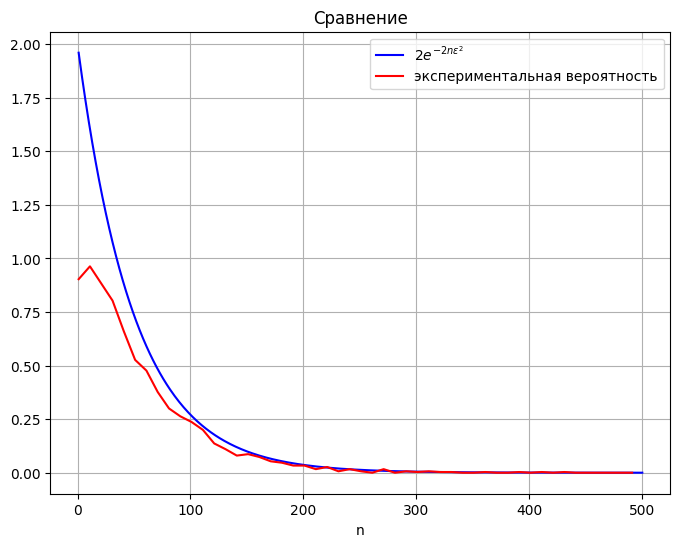

In [18]:
n_values = np.arange(1, 501)
probabilities = 2 * np.exp(-2 * n_values * epsilon**2)

plt.figure(figsize=(8, 6))
plt.plot(n_values, probabilities, label=r'$2e^{-2n\epsilon^2}$', color='blue')
plt.plot(prob_x, prob_y, label=r'экспериментальная вероятность', color='red')
plt.xlabel('n')
plt.title(r'Сравнение')
plt.grid(True)
plt.legend()
plt.show()

Мы используем неравенство слабой сходимости - DWK неравенство для показания выполнения теоремы Гливенко-Кантелли. Видно, что максимальное значение модуля разности между эмпирической функцией распределения и исходной функцией распределения по вероятности сходится к 0 когда n приближается к бесконечности. Неравенство DWK также выполняется почти на всей числовой оси.